In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor


from trading_envs import ProfitTradingEnv
from logger import TrainingLoggerCallback
from data_and_plots import (
    training_plot,
    results_plot_continuous,
    plot_shares_changes_fixed_size,
    plot,
)
from helper import predict_data_env
import pandas as pd

In [2]:
sxr8 = pd.read_csv("sxr8_de_d.csv")
dane = sxr8["Zamkniecie"].to_numpy()
dane

array([ 91.21,  91.3 ,  90.52, ..., 562.2 , 562.54, 556.74], shape=(3660,))

In [3]:
sxr8[3500:]

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
3500,2024-09-24,545.00,545.26,540.50,542.84,26264
3501,2024-09-25,540.56,543.48,540.30,543.38,20299
3502,2024-09-26,546.60,548.52,542.58,542.66,23609
3503,2024-09-27,545.38,546.00,543.50,544.86,21187
3504,2024-09-30,542.98,544.50,540.16,544.20,29754
...,...,...,...,...,...,...
3655,2025-05-15,557.54,562.00,555.50,562.00,53017
3656,2025-05-16,561.54,566.20,561.24,566.18,33963
3657,2025-05-19,559.84,562.94,555.00,562.20,48214
3658,2025-05-20,562.02,564.76,561.22,562.54,32368


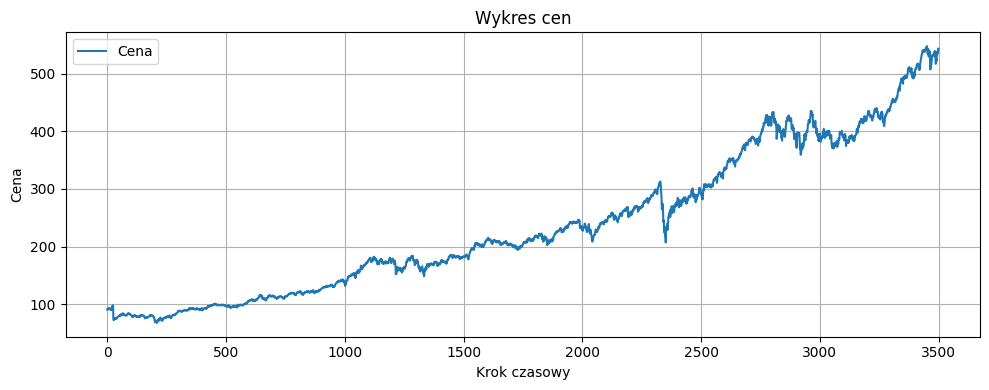

In [13]:
dane_trening = dane[:3500]
plot(dane_trening)

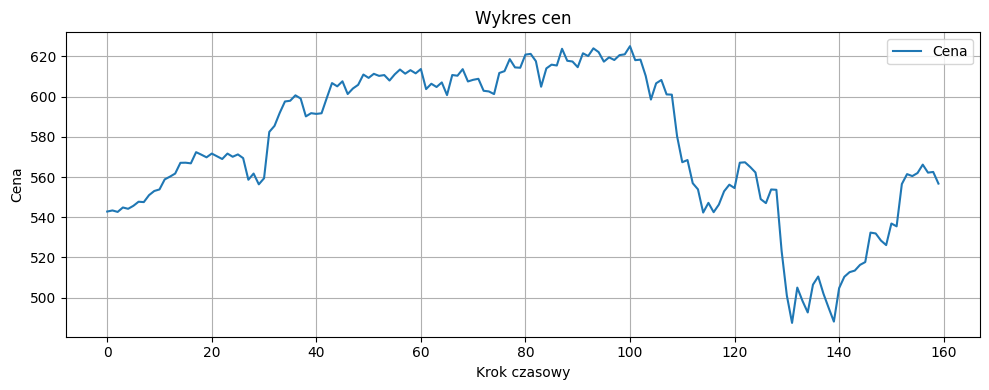

In [14]:
dane_test = dane[3500:]
plot(dane_test)

Using cuda device
Wrapping the env in a DummyVecEnv.


c:\Users\ortek\AppData\Local\pypoetry\Cache\virtualenvs\forecasting-uBk3YmnA-py3.12\Lib\site-packages\stable_baselines3\ppo\ppo.py:155: UserWarning: You have specified a mini-batch size of 1024, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3660`, after every 3 untruncated mini-batches, there will be a truncated mini-batch of size 588
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3660 and n_envs=1)
  warnings.warn(


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 3.5e+03   |
|    ep_rew_mean     | -1.16e+06 |
| time/              |           |
|    fps             | 838       |
|    iterations      | 1         |
|    time_elapsed    | 4         |
|    total_timesteps | 3660      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 3.5e+03      |
|    ep_rew_mean          | -1.14e+06    |
| time/                   |              |
|    fps                  | 822          |
|    iterations           | 2            |
|    time_elapsed         | 8            |
|    total_timesteps      | 7320         |
| train/                  |              |
|    approx_kl            | 9.815815e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | -3.31e-05    |
|    

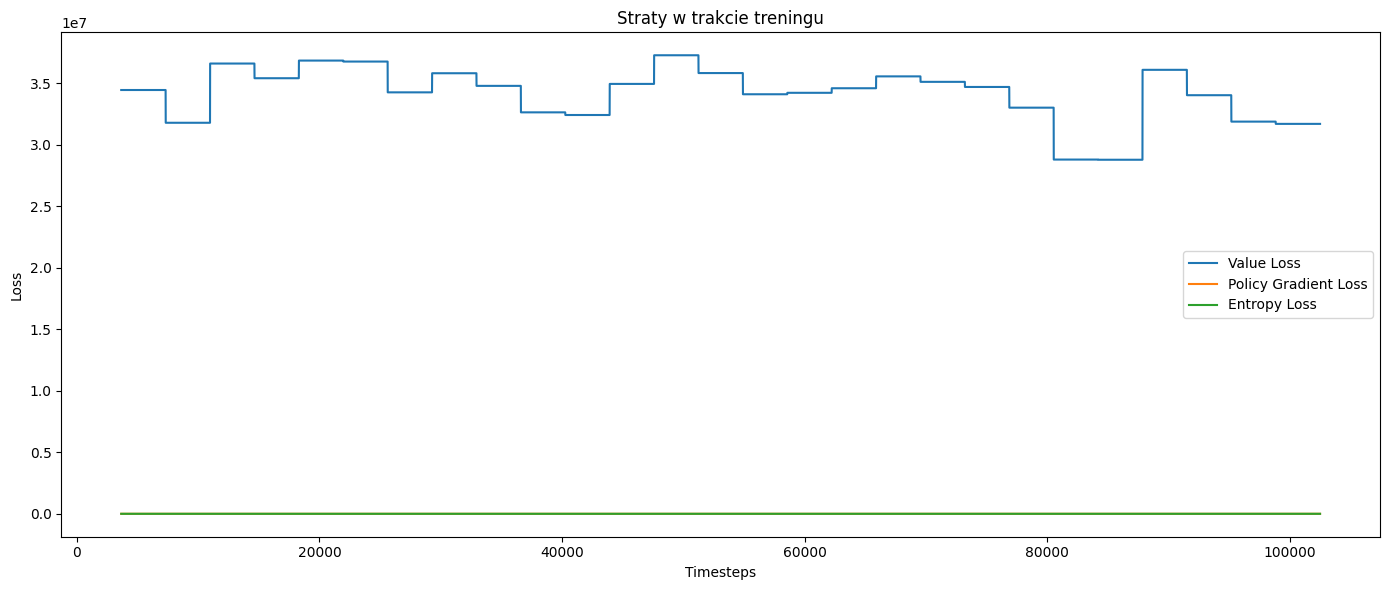

In [18]:
# Stwórz instancję środowiska
env_agent = ProfitTradingEnv(prices=dane_trening, initial_cash=1000)
env_agent = Monitor(env_agent)

# Sprawdź zgodność środowiska ze Stable-Baselines3
check_env(env_agent)

logger_callback = TrainingLoggerCallback()
# Tworzenie modelu PPO
model_agent = PPO(
    "MlpPolicy",
    env_agent,
    # tensorboard_log="./ppo_trading_tensorboard/",  # <- folder z logami
    # policy_kwargs=dict(
    #     net_arch=[
    #         256,
    #         256,
    #         256,
    #     ]
    # ),
    #   learning_rate=0.001,        # domyślnie 3e-4
    n_steps=3660,  # liczba kroków zanim agent zrobi aktualizację
    batch_size=1024,  # batch size do uczenia
    # n_epochs=10,                 # ile razy przebiega po danych przy każdej aktualizacji
    # gamma=0.3,  # współczynnik dyskontujący nagrody
    # gae_lambda=0.95,             # współczynnik GAE
    # clip_range=0.2,              # zakres klipu PPO (stabilizacja treningu)
    # ent_coef=0.2,                # zachęta do eksploracji
    verbose=1,
)

# Trening modelu
model_agent.learn(total_timesteps=100_000, callback=logger_callback)


training_plot(logger_callback=logger_callback)

In [19]:
env_predict, lista = predict_data_env(
    env=ProfitTradingEnv, data=dane_test, agent=model_agent
)

Krok: 1|Cena: 543.38|Gotówka: 1185.68|Akcje: 18|Wartość portfela: 10966.52|Reward: 1353.6800|Profit: 9690.8400|
Krok: 2|Cena: 542.66|Gotówka: 1185.68|Akcje: 18|Wartość portfela: 10953.56|Reward: -1000.0000|Profit: 9677.8800|
Krok: 3|Cena: 544.86|Gotówka: 1185.68|Akcje: 18|Wartość portfela: 10993.16|Reward: 0.0000|Profit: 9717.4800|
Krok: 4|Cena: 544.20|Gotówka: 1185.68|Akcje: 18|Wartość portfela: 10981.28|Reward: -1000.0000|Profit: 9705.6000|
Krok: 5|Cena: 545.68|Gotówka: 1185.68|Akcje: 18|Wartość portfela: 11007.92|Reward: 0.0000|Profit: 9732.2400|
Krok: 6|Cena: 547.72|Gotówka: 1185.68|Akcje: 18|Wartość portfela: 11044.64|Reward: -1000.0000|Profit: 9768.9600|
Krok: 7|Cena: 547.54|Gotówka: 1185.68|Akcje: 18|Wartość portfela: 11041.40|Reward: -1000.0000|Profit: 9765.7200|
Krok: 8|Cena: 551.00|Gotówka: 1185.68|Akcje: 18|Wartość portfela: 11103.68|Reward: 0.0000|Profit: 9828.0000|
Krok: 9|Cena: 553.06|Gotówka: 1185.68|Akcje: 18|Wartość portfela: 11140.76|Reward: -1000.0000|Profit: 9865.08

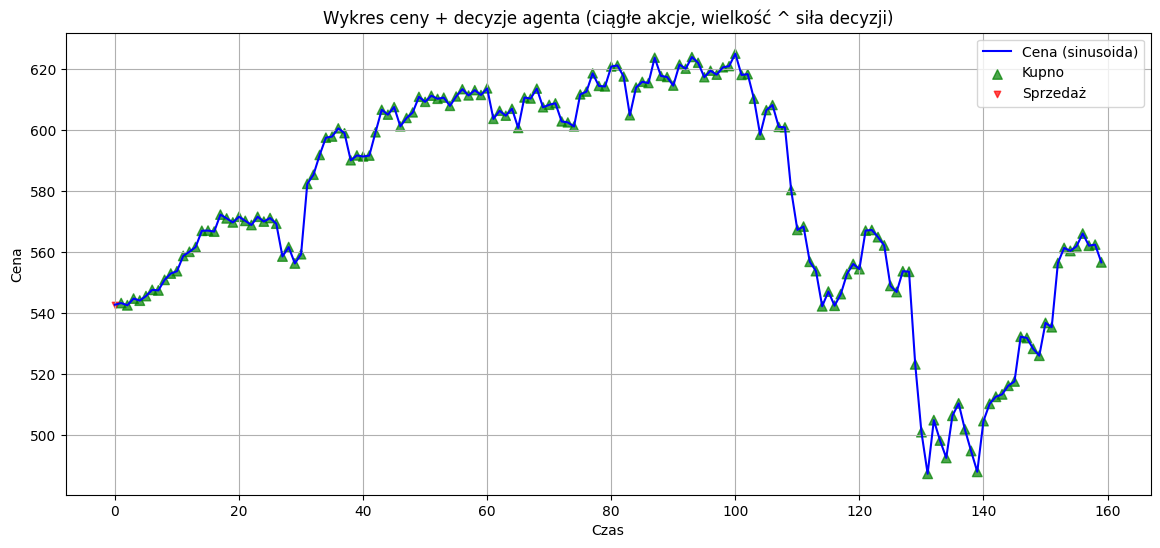

In [20]:
results_plot_continuous(env_predict=env_predict, prices=dane_test)

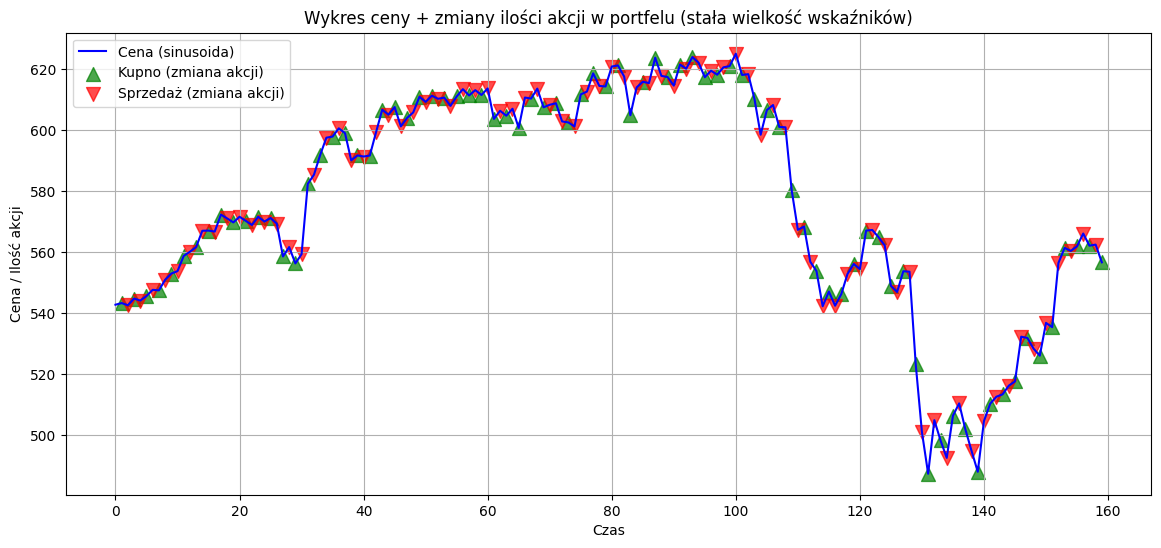

In [11]:
plot_shares_changes_fixed_size(lista, dane_test)